In [1]:
from sunpy.net import Fido, attrs as a
from sunpy.time import parse_time
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from astropy import units as u

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 🔍 Buscar dados AIA (171 Å - UV Extremo) no JSOC

O AIA (Atmospheric Imaging Assembly) é um instrumento a bordo do Solar Dynamics Observatory (SDO), projetado para capturar imagens detalhadas do Sol em diferentes comprimentos de onda do ultravioleta extremo (EUV) e da luz visível.

📡 Principais características do AIA:

✅ Captura imagens do Sol a cada 12 segundos, com alta resolução (4096 × 4096 pixels).

✅ Observa em 10 comprimentos de onda diferentes, cada um focado em diferentes temperaturas da atmosfera solar.

✅ Estuda a corona solar, flares, ejeções de massa coronal (CMEs) e dinâmica da atmosfera solar.

🔬 Alguns comprimentos de onda do AIA e suas aplicações:
171 Å (angstroms): Plasma a ~1 milhão de Kelvin → Estruturas da corona.

193 Å: Plasma a ~1.5 milhões de Kelvin → Buracos coronais e regiões ativas.

304 Å: Plasma a ~50.000 Kelvin → Região da cromosfera e transição da atmosfera solar.

1600 Å: Plasma mais frio (~10.000 K) → Camadas superiores da cromosfera e emissões associadas a flares.

In [ ]:
resultado = Fido.search(
    a.Time("2011-06-05 04:00", "2011-06-05 08:00"),  # Intervalo de um dia
    a.Instrument("AIA"),
    a.Wavelength(171 * u.angstrom),  # Ultra Violeta extremo (171 Å)
    a.Sample((10*60)*u.s) # 1 a cada 10 minutos
)

# 📥 Baixar os arquivos (pega o primeiro conjunto encontrado)

In [3]:
arquivos_baixados = Fido.fetch(resultado[0], path="./", max_conn=5)

Files Downloaded: 100%|██████████| 25/25 [00:31<00:00,  1.25s/file]


# 📂 Abrir os arquivos FITS e processar a curva de luz

In [4]:
fluxo_total = []
horarios = []

for arquivo in arquivos_baixados:
    with fits.open(arquivo) as hdul:
        imagem = hdul[1].data  # Dados da imagem UV
        tempo_obs = parse_time(hdul[1].header['DATE-OBS']).datetime  # Data da observação
        
        fluxo = np.sum(imagem)  # Soma total da luz capturada (proxy de brilho)
        fluxo_total.append(fluxo)
        horarios.append(tempo_obs)

# 📊 Plotar a curva de luz

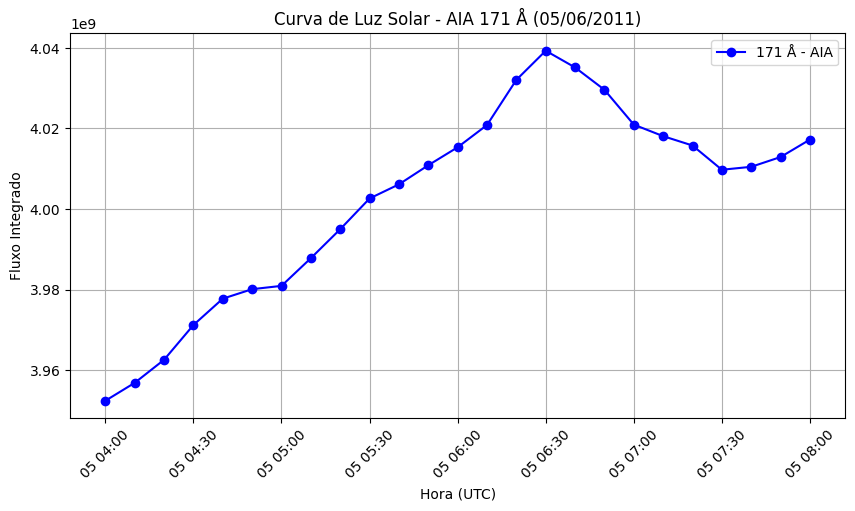

In [5]:
plt.figure(figsize=(10,5))
plt.plot(horarios, fluxo_total, marker='o', linestyle='-', color='b', label="171 Å - AIA")
plt.xlabel("Hora (UTC)")
plt.ylabel("Fluxo Integrado")
plt.title("Curva de Luz Solar - AIA 171 Å (05/06/2011)")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 2024-07-22

In [10]:
resultado_2 = Fido.search(
    a.Time("2024-07-22 17:36", "2024-07-22 23:30"),  # Intervalo de um dia
    a.Instrument("AIA"),
    a.Wavelength(171 * u.angstrom),  # Ultra Violeta extremo (171 Å)
    a.Sample((10*60)*u.s) # 1 a cada 10 minutos
)

In [11]:
arquivos_baixados_2 = Fido.fetch(resultado_2[0], path="./", max_conn=5)

Files Downloaded:   0%|          | 0/36 [00:00<?, ?file/s]


















































































































































































Files Downloaded:   3%|▎         | 1/36 [00:11<06:56, 11.91s/file]



















































































































Files Downloaded:   6%|▌         | 2/36 [00:14<03:36,  6.38s/file]



Files Downloaded:  11%|█         | 4/36 [00:15<01:26,  2.70s/file]




























Files Downloaded:  14%|█▍        | 5/36 [00:19<01:37,  3.15s/file]












































































Files Downloaded:  17%|█▋        | 6/36 [00:26<02:11,  4.40s/file]








































































Files Downloaded:  19%|█▉        | 7/36 [00:29<01:56,  4.02s/file]














































Files Downloaded:  22

8/0 files failed to download. Please check `.errors` for details


In [12]:
fluxo_total = []
horarios = []

for arquivo in arquivos_baixados_2:
    with fits.open(arquivo) as hdul:
        imagem = hdul[1].data  # Dados da imagem UV
        tempo_obs = parse_time(hdul[1].header['DATE-OBS']).datetime  # Data da observação
        
        fluxo = np.sum(imagem)  # Soma total da luz capturada (proxy de brilho)
        fluxo_total.append(fluxo)
        horarios.append(tempo_obs)

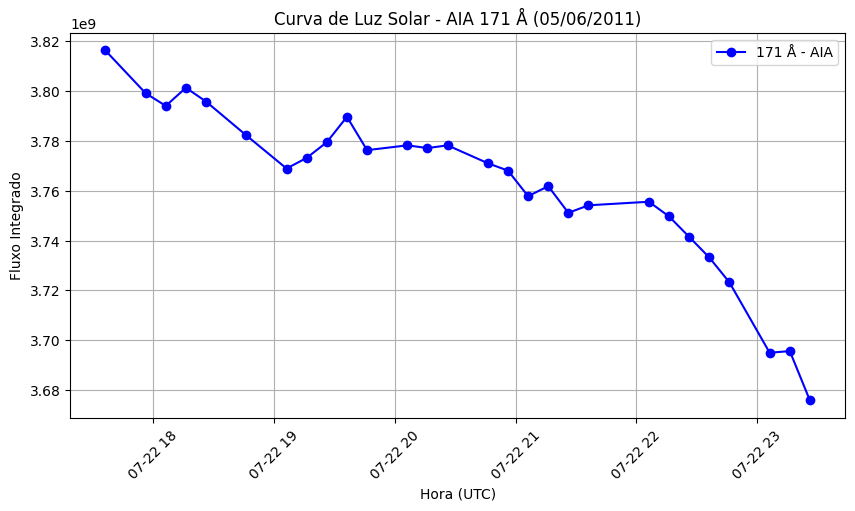

In [13]:
plt.figure(figsize=(10,5))
plt.plot(horarios, fluxo_total, marker='o', linestyle='-', color='b', label="171 Å - AIA")
plt.xlabel("Hora (UTC)")
plt.ylabel("Fluxo Integrado")
plt.title("Curva de Luz Solar - AIA 171 Å (05/06/2011)")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 2022-10-01
CME de 01/10/2022 às 13:25:26 - cdaw.gsfc.nasa.gov - Primeiro Frame UV: 01/10/2022 às 11:45:18 

In [10]:
resultado_3 = Fido.search(
    a.Time("2022-10-01 11:00", "2022-10-01 15:00"),
    a.Instrument("AIA"),
    a.Wavelength(171 * u.angstrom),  # Ultra Violeta extremo (171 Å)
    a.Sample((10*60)*u.s) # 1 a cada 10 minutos
)

In [11]:
arquivos_baixados_3 = Fido.fetch(resultado_3[0], path="./2022-10-01", max_conn=5)

Files Downloaded:   0%|          | 0/24 [00:00<?, ?file/s]































































Files Downloaded:   4%|▍         | 1/24 [00:13<05:15, 13.70s/file]















Files Downloaded:  12%|█▎        | 3/24 [00:19<01:58,  5.63s/file]














Files Downloaded:  17%|█▋        | 4/24 [00:36<03:22, 10.11s/file]




























































Files Downloaded:  21%|██        | 5/24 [00:47<03:13, 10.18s/file]















Files Downloaded:  25%|██▌       | 6/24 [00:50<02:22,  7.92s/file]
















































Files Downloaded:  29%|██▉       | 7/24 [00:56<02:01,  7.15s/file]



























































Files Downloaded:  33%|███▎      | 8/24 [01:00<01:41,  6.34s/file]



































Files Downloaded:  38%|███▊      | 9/24 [01:09<01:45,  7.06s/file]























































Files Downloaded:  46%|████▌     | 11/24 

11/0 files failed to download. Please check `.errors` for details


In [12]:
fluxo_total = []
horarios = []

for arquivo in arquivos_baixados_3:
    with fits.open(arquivo) as hdul:
        imagem = hdul[1].data  # Dados da imagem UV
        tempo_obs = parse_time(hdul[1].header['DATE-OBS']).datetime  # Data da observação
        
        fluxo = np.sum(imagem)  # Soma total da luz capturada (proxy de brilho)
        fluxo_total.append(fluxo)
        horarios.append(tempo_obs)

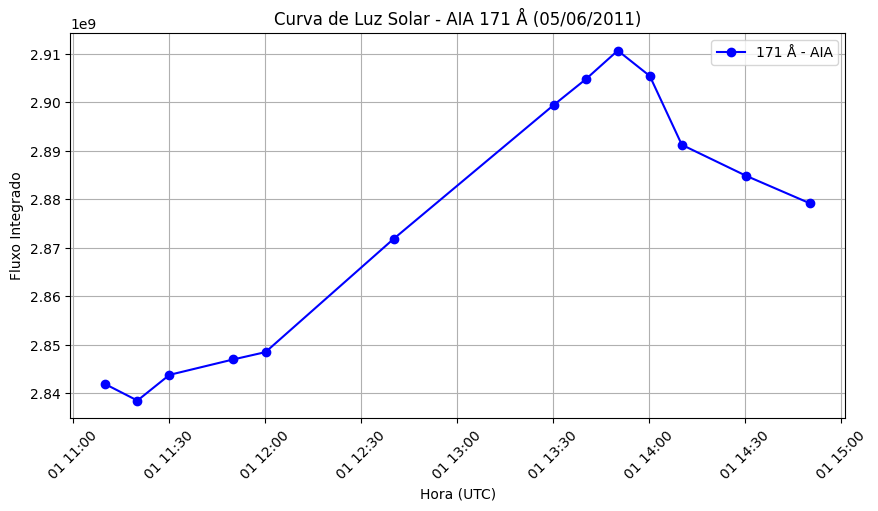

In [13]:
plt.figure(figsize=(10,5))
plt.plot(horarios, fluxo_total, marker='o', linestyle='-', color='b', label="171 Å - AIA")
plt.xlabel("Hora (UTC)")
plt.ylabel("Fluxo Integrado")
plt.title("Curva de Luz Solar - AIA 171 Å (05/06/2011)")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 2017-04-24

CME de 24/04/2017 às 02:48:05 - cdaw.gsfc.nasa.gov - Primeiro Frame UV: 23/04/2017 às 21:14:06

In [6]:
resultado_3 = Fido.search(
    a.Time("2017-04-24 19:00", "2017-04-24 22:00"),  # Intervalo de um dia
    a.Instrument("AIA"),
    a.Wavelength(171 * u.angstrom),  # Ultra Violeta extremo (171 Å)
    a.Sample((10*60)*u.s) # 1 a cada 10 minutos
)

In [7]:
arquivos_baixados_3 = Fido.fetch(resultado_3[0], path="./2017-04-24", max_conn=5)

Files Downloaded:   0%|          | 0/18 [00:00<?, ?file/s]











































































































Files Downloaded:   6%|▌         | 1/18 [00:24<07:01, 24.82s/file]









Files Downloaded:  17%|█▋        | 3/18 [00:30<01:58,  7.90s/file]





























Files Downloaded:  22%|██▏       | 4/18 [00:34<01:27,  6.27s/file]













Files Downloaded:  28%|██▊       | 5/18 [00:36<01:02,  4.81s/file]



























































Files Downloaded:  33%|███▎      | 6/18 [00:49<01:33,  7.80s/file]




Files Downloaded:  39%|███▉      | 7/18 [00:54<01:15,  6.82s/file]










































































Files Downloaded:  44%|████▍     | 8/18 [01:02<01:12,  7.20s/file]









Files Downloaded:  50%|█████     | 9/18 [01:03<00:45,  5.06s/file]












Files Downloaded:  56%|█████▌    | 10/18 [01:06<00:37,  4.68s/file]























In [8]:
fluxo_total = []
horarios = []

for arquivo in arquivos_baixados_3:
    with fits.open(arquivo) as hdul:
        imagem = hdul[1].data  # Dados da imagem UV
        tempo_obs = parse_time(hdul[1].header['DATE-OBS']).datetime  # Data da observação
        
        fluxo = np.sum(imagem)  # Soma total da luz capturada (proxy de brilho)
        fluxo_total.append(fluxo)
        horarios.append(tempo_obs)

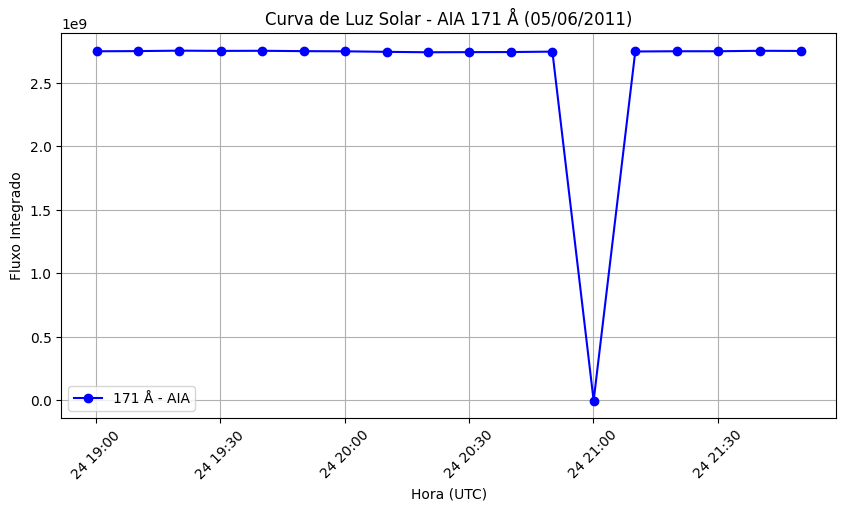

In [9]:
plt.figure(figsize=(10,5))
plt.plot(horarios, fluxo_total, marker='o', linestyle='-', color='b', label="171 Å - AIA")
plt.xlabel("Hora (UTC)")
plt.ylabel("Fluxo Integrado")
plt.title("Curva de Luz Solar - AIA 171 Å (05/06/2011)")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 2017-04-30

CME de 30/04/2017 às 02:36:05 - cdaw.gsfc.nasa.gov - Primeiro Frame UV: 29/04/2017 às 23:43:18

In [22]:
resultado_3 = Fido.search(
    a.Time("2017-04-30 01:00", "2017-04-30 06:00"), 
    a.Instrument("AIA"),
    a.Wavelength(171 * u.angstrom),  # Ultra Violeta extremo (171 Å)
    a.Sample((10*60)*u.s) # 1 a cada 10 minutos
)

In [23]:
arquivos_baixados_3 = Fido.fetch(resultado_3[0], path="./2017-04-30", max_conn=5)

Files Downloaded:   0%|          | 0/6 [00:00<?, ?file/s]





























































































Files Downloaded:  17%|█▋        | 1/6 [00:11<00:59, 11.87s/file]















Files Downloaded:  50%|█████     | 3/6 [00:13<00:09,  3.29s/file]

































Files Downloaded:  67%|██████▋   | 4/6 [00:15<00:05,  2.94s/file]





































Files Downloaded:  83%|████████▎ | 5/6 [00:18<00:02,  2.70s/file]































Files Downloaded: 100%|██████████| 6/6 [00:22<00:00,  3.75s/file]


In [24]:
fluxo_total = []
horarios = []

for arquivo in arquivos_baixados_3:
    with fits.open(arquivo) as hdul:
        imagem = hdul[1].data  # Dados da imagem UV
        tempo_obs = parse_time(hdul[1].header['DATE-OBS']).datetime  # Data da observação
        
        fluxo = np.sum(imagem)  # Soma total da luz capturada (proxy de brilho)
        fluxo_total.append(fluxo)
        horarios.append(tempo_obs)

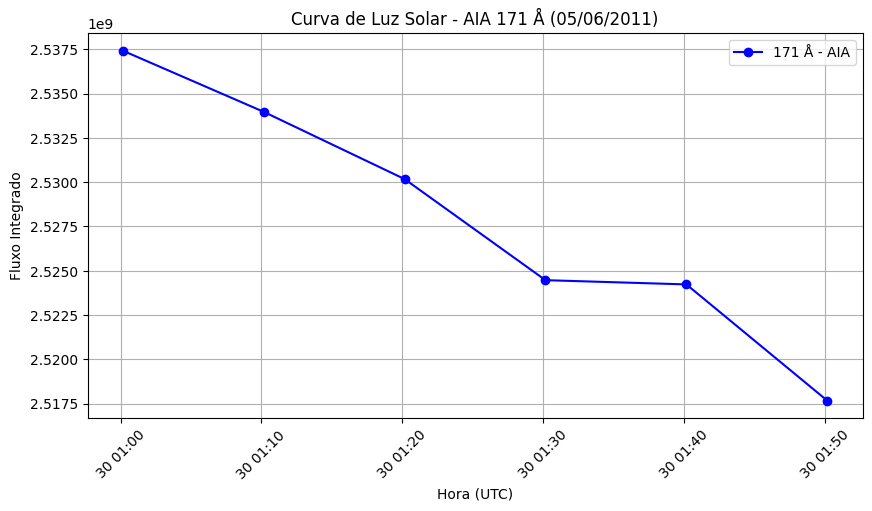

In [25]:
plt.figure(figsize=(10,5))
plt.plot(horarios, fluxo_total, marker='o', linestyle='-', color='b', label="171 Å - AIA")
plt.xlabel("Hora (UTC)")
plt.ylabel("Fluxo Integrado")
plt.title("Curva de Luz Solar - AIA 171 Å (05/06/2011)")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()